In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
kf_mae = pd.read_csv("results/gru_kf_mae.csv")
los_mae = pd.read_csv("results/los_transformer_mae.csv")
mortality_auroc = pd.read_csv("results/gru_mortality_auroc_auprc.csv")
pooled_mortality = pd.read_csv("results/gru_mortality_auroc_auprc_pooled.csv")

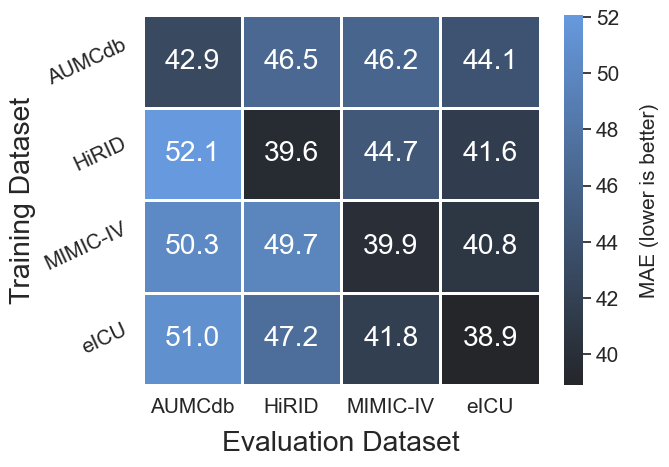

In [109]:
kf_pivoted = kf_mae.pivot(index = "source_db", columns=["eval_db"], values=["result"])
los_pivoted = los_mae.pivot(index = "source_db", columns=["eval_db"], values=["result"])
table = los_pivoted
sns.set(font_scale=1.7)

hm = sns.heatmap(table, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=False, as_cmap=True,), yticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], xticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], linewidth=2)
hm.tick_params(axis='x', rotation=0, labelsize=15)
hm.tick_params(axis='y', rotation=25, labelsize=15)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
label = cbar.set_label('MAE (lower is better)', labelpad=15, fontsize=15)
hm.set(xlabel="Evaluation Dataset", ylabel="Training Dataset")
hm.set_xlabel(xlabel="Evaluation Dataset", labelpad=10)
plt.savefig("results/ext_val_los_transformer_mae.pdf", bbox_inches='tight')


In [98]:
kf_pivoted = kf_mae.pivot(index = "source_db", columns=["eval_db"], values=["result"])
los_pivoted = los_mae.pivot(index = "source_db", columns=["eval_db"], values=["result"])
# mortality_auroc = pd.concat([mortality_auroc,pooled_mortality])
value = "AUPRC"
mortality_pivoted = mortality_auroc.pivot(index = "source_db", columns=["eval_db"], values=[value])
# mortality_pooled_pivoted = pooled_mortality.pivot(index = 'source_db', columns=["eval_db"], values=[value])
# table2 = pooled_mortality

# # Swap columns 3 and 4
pivot_table = mortality_pivoted.iloc[:, [0, 1, 3, 2]]
# Swap rows 3 and 4
mortality_pivoted = pivot_table.iloc[[0, 1, 3, 2, 4]]
# table1 = mortality_pivoted

In [99]:
mortality_pivoted

AUPRC                                 
eval_db       AUMCdb      HiRID       eICU   MIMIC-IV
source_db                                            
AUMCdb     53.755979  27.827063  28.917440  33.415269
HiRID      46.130789  39.399273  24.328600  32.304638
eICU       49.214875  30.092399  35.594089  39.857508
MIMIC-IV   50.927447  28.628607  28.029452  42.793232
pooled     49.897487  31.373512  30.646796  37.888004

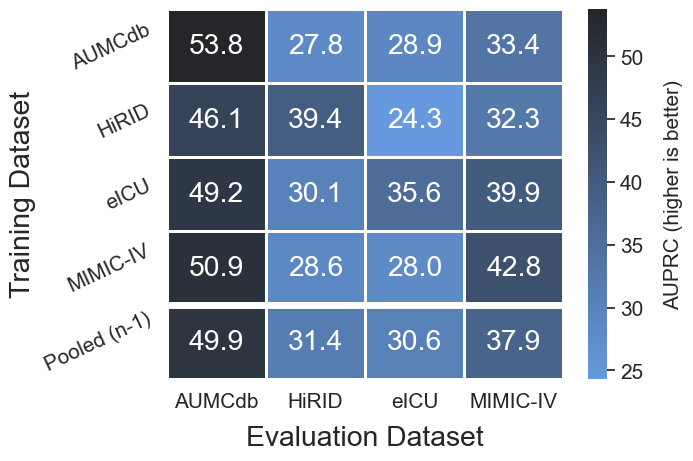

In [100]:

sns.set(font_scale=1.7)
pooled_auprc = [[49.897487,31.373512,37.888004,30.646796]]
pooled_auroc = [[82.478008,79.628521,83.917515,82.445357]]
# fig, (ax1, ax2) = plt.subplots(nrows=2)
hm = sns.heatmap(mortality_pivoted, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True,), yticklabels=["AUMCdb", "HiRID", "eICU", "MIMIC-IV", "Pooled (n-1)"], xticklabels=["AUMCdb", "HiRID","eICU", "MIMIC-IV"], linewidth=2)
# hm2 = sns.heatmap(pooled_auprc, xticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], ax=ax2, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=False, as_cmap=True,), yticklabels=["Pooled"], linewidth=2)
hm.tick_params(axis='x', rotation=0, labelsize=15)
hm.tick_params(axis='y', rotation=25, labelsize=15)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
label = cbar.set_label(f'{value} (higher is better)', labelpad=15, fontsize=15)
hm.set(xlabel="Evaluation Dataset", ylabel="Training Dataset")
hm.set_xlabel(xlabel="Evaluation Dataset", labelpad=10)
hm.hlines([4], *hm.get_xlim(), colors="white", linewidth=5)

plt.savefig(f"results/ext_val_mortality_pooled_{value}.pdf", bbox_inches='tight')


In [92]:
mortality_pivoted


AUROC                                 
eval_db       AUMCdb      HiRID   MIMIC-IV       eICU
source_db                                            
AUMCdb     83.895604  79.578975  80.423402  77.774193
HiRID      80.508245  84.828756  80.459259  77.333722
MIMIC-IV   81.633402  78.474153  87.613348  81.741245
eICU       82.068962  79.350373  86.046833  86.016321
pooled     82.478008  79.628521  83.917515  82.445357

In [81]:
# mortality_pivoted.reindex(["AUMCdb", "HiRID","eICU",  "MIMIC-IV", "pooled"])
mortality_pivoted.reindex_axis(columns=["AUMCdb", "HiRID","eICU",  "MIMIC-IV"], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [82]:
mortality_pivoted = mortality_auroc.pivot(index = "source_db", columns=["eval_db"], values=[value])

In [84]:
pivot_table = mortality_pivoted.iloc[:, [0, 1, 3, 2]]

# Swap rows 3 and 4
pivot_table = pivot_table.iloc[[0, 1, 3, 2, 4], :]

In [85]:
pivot_table

AUPRC                                 
eval_db       AUMCdb      HiRID       eICU   MIMIC-IV
source_db                                            
AUMCdb     53.755979  27.827063  28.917440  33.415269
HiRID      46.130789  39.399273  24.328600  32.304638
eICU       49.214875  30.092399  35.594089  39.857508
MIMIC-IV   50.927447  28.628607  28.029452  42.793232
pooled     49.897487  31.373512  30.646796  37.888004

In [30]:
sns.heatmap(table2, ax=ax2, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=False, as_cmap=True,), linewidth=2)

ValueError: could not convert string to float: 'pooled'

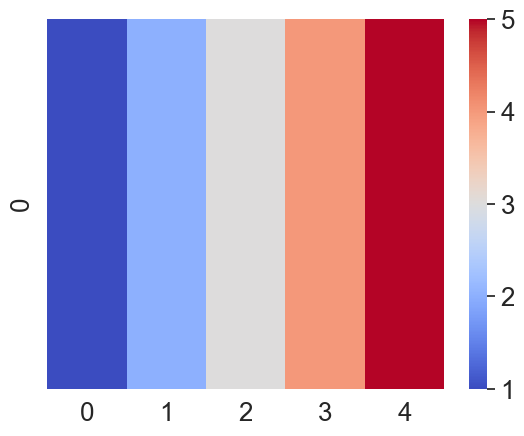

In [26]:
# Example data
data = [[1, 2, 3, 4, 5]]  # One row with five numeric values

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Create the heatmap
sns.heatmap(df, cmap='coolwarm')

plt.show()

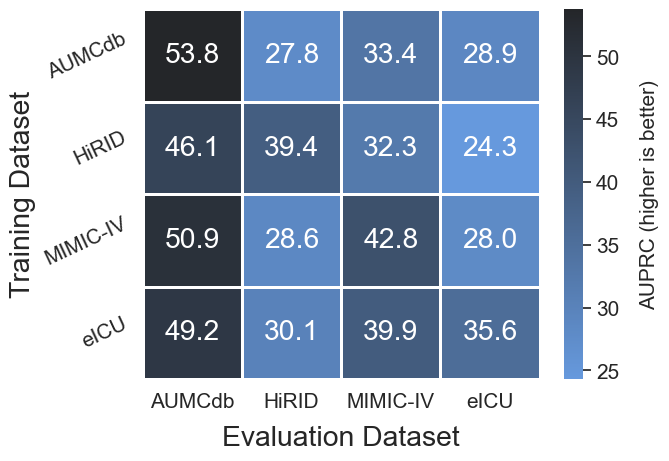

In [111]:
mortality_pivoted = mortality_auroc.pivot(index = "source_db", columns=["eval_db"], values=["AUPRC"])
table = mortality_pivoted
sns.set(font_scale=1.7)

hm = sns.heatmap(table, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True,), xticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], linewidth=2)
hm.tick_params(axis='x', rotation=0, labelsize=15)
hm.tick_params(axis='y', rotation=25, labelsize=15)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
label = cbar.set_label('AUPRC (higher is better)', labelpad=15, fontsize=15)
hm.set(xlabel="Evaluation Dataset", ylabel="Training Dataset")
hm.set_xlabel(xlabel="Evaluation Dataset", labelpad=10)
plt.savefig("results/ext_val_mortality_gru_auprc.pdf", bbox_inches='tight')

In [32]:
kf_mae.pivot(index = "source_db", columns=["eval_db"], values=["result","std"])

result                           std                       
eval_db   AUMCdb  HiRID MIMIC-IV   eICU AUMCdb  HiRID MIMIC-IV   eICU
source_db                                                            
AUMCdb     0.224  0.340    0.361  0.446  0.004  0.003    0.001  0.001
HiRID      0.325  0.270    0.423  0.493  0.002  0.005    0.001  0.001
MIMIC-IV   0.306  0.375    0.241  0.333  0.002  0.003    0.003  0.001
eICU       0.299  0.378    0.263  0.288  0.002  0.003    0.001  0.002

In [21]:
kf_mae.columns

Index(['source_db', 'eval_db', 'result', 'std'], dtype='object')

In [55]:
transfer_learning = pd.read_csv("results/transfer_learning.csv")


In [56]:
transfer_learning

,Name,State,data_dir,model,Runtime,fine_tune,lr_scheduler,samples,avg.AUC,std.AUC,...,test/AUC,test/PR,train/AUC,train/PR,val/AUC,val/PR,lr-Adam,AUC,AUC_std,PR
0,Classification_GRU_hirid,crashed,../../data/mortality24/hirid,GRU,108,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Classification_GRU_hirid_train_size_12000,finished,../../data/mortality24/hirid,GRU,12109,NaN,NaN,12000.0,0.856602,0.005389,...,0.847026,0.352231,0.881176,0.446740,0.864806,0.421641,1.640000e-07,85.660199,0.538897,41.434511
2,Classification_GRU_hirid_train_size_10000,finished,../../data/mortality24/hirid,GRU,11527,NaN,NaN,10000.0,0.847565,0.002277,...,0.842566,0.360030,0.880565,0.442270,0.834441,0.365911,8.020000e-07,84.756479,0.227658,38.603485
3,Classification_GRU_hirid_train_size_8000,finished,../../data/mortality24/hirid,GRU,42388,NaN,NaN,8000.0,0.837676,0.001889,...,0.848201,0.367852,0.875590,0.442950,0.848716,0.389785,1.100000e-06,83.767597,0.188854,36.415199
4,Classification_GRU_hirid_train_size_6000,running,../../data/mortality24/hirid,GRU,50394,NaN,NaN,6000.0,0.830290,0.001530,...,NaN,NaN,NaN,NaN,NaN,NaN,3.030000e-07,83.029009,0.153000,35.739886
5,Classification_GRU_hirid_train_size_4000,finished,../../data/mortality24/hirid,GRU,33723,NaN,NaN,4000.0,0.819937,0.001163,...,0.816230,0.320773,0.870496,0.445995,0.812869,0.316633,1.040000e-06,81.993683,0.116274,32.738921
6,Classification_GRU_hirid_train_size_2000,finished,../../data/mortality24/hirid,GRU,6101,NaN,NaN,2000.0,0.781202,0.002183,...,0.784940,0.277339,0.854609,0.364498,0.824806,0.410123,4.130000e-07,78.120159,0.218312,27.601015
7,Classification_GRU_hirid_train_size_1000,finished,../../data/mortality24/hirid,GRU,8226,NaN,NaN,1000.0,0.738668,0.004148,...,0.745257,0.256988,0.841250,0.386723,0.727628,0.290671,9.330000e-07,73.866840,0.414769,24.125065
8,Classification_GRU_hirid_train_size_500,finished,../../data/mortality24/hirid,GRU,4657,NaN,NaN,500.0,0.681737,0.005163,...,0.661425,0.188823,0.806729,0.490373,0.683060,0.120370,6.050000e-06,68.173663,0.516345,19.664202
9,Classification_GRU_hirid_train_size_100,finished,../../data/mortality24/hirid,GRU,3181,NaN,NaN,100.0,0.621460,0.010472,...,0.626153,0.141245,0.931507,0.562065,0.611111,0.316667,4.090000e-06,62.146039,1.047227,15.529473


In [14]:
transfer_learning["AUC_low"]=transfer_learning["AUC"]-transfer_learning["AUC_std"]
transfer_learning["AUC_high"]=transfer_learning["AUC"]+transfer_learning["AUC_std"]

C:\Users\Robin\AppData\Local\Temp\ipykernel_22164\4255464839.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  tl = sns.lineplot(data=transfer_learning, x=transfer_learning["fine_tune"], y="AUC", legend=True, palette="colorblind", label="Fine-tune eICU on HiRID", marker="o")


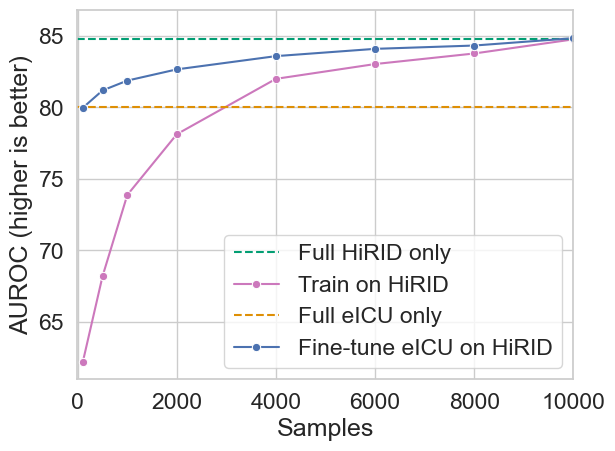

In [50]:
sns.set(font_scale=1.5)
sns.set_style(style="whitegrid")

t2 = sns.lineplot(data=transfer_learning, x=transfer_learning["samples"], y="AUC", legend=True, color=sns.color_palette("colorblind")[4], label="Train on HiRID", marker="o")
target = t2.axhline(84.8, ls='--', color=sns.color_palette("colorblind")[2], label="Full HiRID only")
source = t2.axhline(80, ls='--', color=sns.color_palette("colorblind")[1], label="Full eICU only")

tl = sns.lineplot(data=transfer_learning, x=transfer_learning["fine_tune"], y="AUC", legend=True, palette="colorblind", label="Fine-tune eICU on HiRID", marker="o")

# tl.set_xticks(range(8))
# tl.set_xticklabels([100,500,1000,2000,4000,6000,8000,10000])

tl.set(xlabel="Samples", ylabel="AUROC (higher is better)")
# tl.fill_between(transfer_learning["fine_tune"], transfer_learning["AUC_low"], transfer_learning["AUC_high"], alpha=0.5)
# tl.fill_between(transfer_learning["samples"], transfer_learning["AUC_low"], transfer_learning["AUC_high"], alpha=0.5)
handles, labels = tl.get_legend_handles_labels()

# Reorder the handles and labels
handles = [handles[1], handles[0], handles[2], handles[3]]  # Swap the order of handles
labels = [labels[1], labels[0], labels[2], labels[3]]     # Swap the order of labels

# tl.fill_between(transfer_learning["AUC_std"])
plt.xlim(-10,10000)
# tl.legend(labels=["Fine-tuning","Full target", "Source only"], loc='lower right')
# tl.set_facecolor("white")
tl.legend(handles=handles, labels=labels,loc='lower right')
# replace labels
plt.savefig("results/transfer_learning.pdf", bbox_inches='tight', facecolor="white")

# plt.errorbar(data=transfer_learning, x="fine_tune", y="AUC", yerr='AUC_std', linestyle="None", color="black", capsize=3)

C:\Users\Robin\AppData\Local\Temp\ipykernel_22164\1238655720.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  tl = sns.lineplot(data=transfer_learning, x=transfer_learning["fine_tune"], y="PR", legend=True, palette="colorblind",


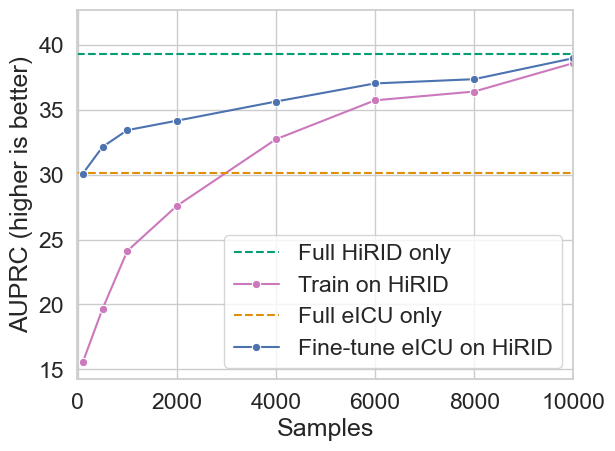

In [59]:

sns.set(font_scale=1.5)
sns.set_style(style="whitegrid")

t2 = sns.lineplot(data=transfer_learning, x=transfer_learning["samples"], y="PR", legend=True,
                  color=sns.color_palette("colorblind")[4], label="Train on HiRID", marker="o")
target = t2.axhline(39.3, ls='--', color=sns.color_palette("colorblind")[2], label="Full HiRID only")
source = t2.axhline(30.1, ls='--', color=sns.color_palette("colorblind")[1], label="Full eICU only")

tl = sns.lineplot(data=transfer_learning, x=transfer_learning["fine_tune"], y="PR", legend=True, palette="colorblind",
                  label="Fine-tune eICU on HiRID", marker="o")

# tl.set_xticks(range(8))
# tl.set_xticklabels([100,500,1000,2000,4000,6000,8000,10000])

tl.set(xlabel="Samples", ylabel="AUPRC (higher is better)")
# tl.fill_between(transfer_learning["fine_tune"], transfer_learning["AUC_low"], transfer_learning["AUC_high"], alpha=0.5)
# tl.fill_between(transfer_learning["samples"], transfer_learning["AUC_low"], transfer_learning["AUC_high"], alpha=0.5)
handles, labels = tl.get_legend_handles_labels()

# Reorder the handles and labels
handles = [handles[1], handles[0], handles[2], handles[3]]  # Swap the order of handles
labels = [labels[1], labels[0], labels[2], labels[3]]  # Swap the order of labels

# tl.fill_between(transfer_learning["AUC_std"])
plt.xlim(-10, 10000)
# tl.legend(labels=["Fine-tuning","Full target", "Source only"], loc='lower right')
# tl.set_facecolor("white")
tl.legend(handles=handles, labels=labels, loc='lower right')
# replace labels
plt.savefig("results/transfer_learning_auprc.pdf", bbox_inches='tight', facecolor="white")
